In [359]:
import nltk
import string
import pandas as pd
import numpy as np
import re
import string
from matplotlib import pyplot as plt
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from textstat.textstat import *

In [360]:
 hate_df = pd.read_csv("dataset/Dataset1_labeled_data.csv")

In [361]:
hate_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [362]:
hate_df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [363]:
#removed the first column because it didn't provide any information

In [364]:
hate_df = hate_df.drop(columns=['Unnamed: 0'])

In [365]:
hate_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [366]:
hate_df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


## describing the columns of the dataset
- count = No of people who annotated each tweet
- hate_speech = No of people who annotated the tweet as hate_speech
- offensive = No of people who annotated the tweet as offensive
- Neither = No. of people who annotated each tweet as neither hate nor offensive
- class = class labels( 0-hate_speech, 1-offensive_language, 2-neither)

In [367]:
hate_df['class'].value_counts() #count of tweets for each class labels

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Tweet distribution among 3 classes')

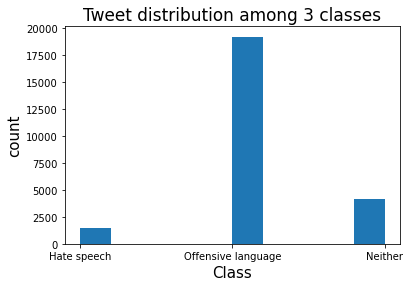

In [368]:
plt.hist(hate_df['class'], align='mid')
plt.ylabel('count', fontsize=15)
col_labels=['Hate speech', 'Offensive language', 'Neither']
x_values=np.arange(0, len(col_labels))
plt.xlabel('Class', fontsize=15)
plt.xticks(x_values, col_labels)
plt.title('Tweet distribution among 3 classes', fontsize=17)

We can see that the offensive class is highly populated compared to the other two classes. This can cause some bias towards the offensive class when later training the model.
One solution would be to balance the dataset using oversampling and undersampling.
I will try that in a later step of the process

# 2. Data Preprocessing 

First I will clean the tweets in the dataset. following operations will be performed in preprocessing step.
- tokenize
- remove stopwords
- stem
- remove URLs
- remove @mention tags
- remove punctutations
- remove numbers
- remove spaces
- lowercase


In [369]:
tweet=hate_df.tweet

In [370]:
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [371]:
#load stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
print(stop_words)#print the stopwords list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I'll remove some of the words from above stopwords list because they might affect the sentiment of a sentence.

In [372]:
stop_words.remove("not")

In [373]:
stop_words.extend("rt")

In [374]:
stemmer = PorterStemmer()

def preprocess(tweet):
    
    #remove extra spaces
    regex_pattern = re.compile(r'\s+')
    tweet_space_removed = tweet.str.replace(regex_pattern, ' ')
    
    #remove mentions(@)
    regex_patten = re.compile(r'@[\w\-]+')
    tweets = tweet_space_removed.str.replace(regex_patten, '')
    
    #remove URLs
    url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets_new = tweets.str.replace(url_regex, '')
    
    #remove numbers and punctuations
    remove_punc_num = tweets_new.str.replace("[^a-zA-Z]", " ")
    
    #replace whitespaces with space
    newtweet = remove_punc_num.str.replace(r'\s+', ' ')
    
    #remove leading and trailing whitespaces
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    
    #lowercase
    tweets_lower = newtweet.str.lower()
    
    #tokenize
    tokenized_tweet = tweets_lower.apply(lambda x: x.split())
    
    #remove stop words
    tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])
    
    #stem the tweet
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        pre_tweets = tokenized_tweet
        
    return pre_tweets
    
preprocessed_tweets = preprocess(tweet)
    
hate_df['preprocessed_tweets'] = preprocessed_tweets
print(hate_df[["tweet","preprocessed_tweets"]].head(10))


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                 preprocessed_tweets  
0  rt woman complain clean hous amp man alway tak...  
1  rt boy dat cold tyga dwn bad cuffin dat hoe st...  
2   rt dawg rt ever fuck bitch start cri confus shit  
3                                rt look like tranni  
4  rt shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

# Feature Extraction

* Features are the variables that the machine learning algorithms use to train with. features are also known as independant variables.
* I planned to extract three different feature sets to be used to compare to find out which features are more useful
* 1. TF-IDF - Term Frequency- Inverse Document Frequency
* 2. Polarity scores by doing a sentiment analysis
* 3. FKRA and FRE scores with some additional featurs
***


## 1: TF-IDF

* The term frequency-inverse document frequency vector is a method of determining the importance of a word or phrase. The presence of a unique word in a text may be determined using TF-IDF. This might be an important feature in recognizing the significance of various words in understanding specific different types of speech
* They are intended as weighting factors reflecting the importance of a word in a tweet among a collection of tweets.
* The term frequency represents the number of appearance of a word in a document, and the adjustment is made by the inverse document frequency. The inverse document frequency role is to give more weight to meaningful words, and reduce the weight of word not giving relevant information.

In [375]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [376]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(hate_df['preprocessed_tweets'])#feature matrix

In [377]:
tfidf

<24783x6794 sparse matrix of type '<class 'numpy.float64'>'
	with 203497 stored elements in Compressed Sparse Row format>

In [378]:
print(tfidf)

  (0, 5899)	0.3895484939875555
  (0, 5185)	0.4144986349231078
  (0, 6172)	0.19246718350590478
  (0, 5886)	0.2435832297238816
  (0, 103)	0.25748371192925085
  (0, 3652)	0.22598841095809424
  (0, 124)	0.20746703102056352
  (0, 2906)	0.2935344050923211
  (0, 1197)	0.336083058427105
  (0, 1273)	0.34173224409911557
  (0, 6613)	0.3043869233998087
  (0, 4909)	0.10539761982292996
  (1, 1463)	0.3318876699404794
  (1, 4932)	0.336404015570907
  (1, 4441)	0.2755968294869668
  (1, 5691)	0.28194530204137186
  (1, 2725)	0.1143921832686951
  (1, 1395)	0.3540802182468746
  (1, 321)	0.19523151408628528
  (1, 6295)	0.3340830834194979
  (1, 1229)	0.28194530204137186
  (1, 1461)	0.4413283020640348
  (1, 896)	0.22472806570675913
  (1, 4909)	0.0910186615717789
  (2, 727)	0.3390168249843799
  :	:
  (24780, 966)	0.343011332843257
  (24780, 63)	0.37409643142606824
  (24780, 4110)	0.26604418498734955
  (24780, 1552)	0.2613777761879398
  (24780, 2196)	0.2280990649157048
  (24780, 1720)	0.21384505532921141
  (2478

In [379]:
#convert the matrix to an array
tfidf_a = tfidf.toarray()
tfidf_a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***

## 2: Polarity Scores using sentiment  Analysis

* Text classification extends beyond simple analytical processing. It is critical to understand the sentiment underlying the message; else, its real meaning will most likely be misunderstood and/or misinterpreted. Vader sentiment of NLTK will be used to capture polarity scores (positive, negative, and neutral) of each sentence to be used as a set of features for ML algorithms

In [380]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [381]:
sentiment_analyzer=VS()#object

def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features=sentiment_analysis_array(tweet)

new_features = pd.DataFrame({'Neg':sentiment_features[:,0], 'Pos':sentiment_features[:,1], 'Neu':sentiment_features[:,2], 'compound':sentiment_features[:,3]})
new_features

,Neg,Pos,Neu,compound
0,0.000,0.120,0.880,0.4563
1,0.237,0.000,0.763,-0.6876
2,0.538,0.000,0.462,-0.9550
3,0.000,0.344,0.656,0.5673
4,0.249,0.081,0.669,-0.7762
...,...,...,...,...
24778,0.000,0.000,1.000,0.0000
24779,0.454,0.000,0.546,-0.8074
24780,0.000,0.219,0.781,0.4738
24781,0.573,0.000,0.427,-0.7717


## 3: some additional Features

I decided to use Flesh kincaid grade level(*FKGL*) and flesh Reading ease(*FRE*) score as 2 of the additional features.

* flesh readability formulas were developed by *rudolf flesh* in 1940. these scores are used to assess the readability of a text
* *FRE* gives a text a score between 1-100 with 100 being the highest readability score. this method is used by marketers, research communicators etc.All use it to help them assess the ease by which a piece of text will be understood and engaged with.

* *FKGL* is a widely used readability formula which assesses the approximate reading grade level of a text. f a text has a Flesch Kincaid level of 8, this means the reader needs a grade 8 level of reading or above to understand it. Even if they’re an advanced reader, it means the content is less time-consuming to read. 

to use these formulas, we have to find below featurs:
* syllables - total number of syllables per tweet
* average syllables - total syllables/total words
* number of characters - sum of number of characters in a tweet
* total characters - length of a tweet
* number of words - number of words in a tweet
* number of unique words

In [382]:
from textstat.textstat import textstat

In [383]:
def additional_features(tweet):
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    length = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_words = len(set(tweet.split()))
    
    # FKGL grade
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    #FRE score
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    addit_features = [FKRA, FRE, syllables, avg_syl, num_chars, length, num_words,  num_unique_words]
    return addit_features

def get_additional_features_array(tweets):
    features = []
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

addifeatures = get_additional_features_array(preprocessed_tweets)

df_addifeatures = pd.DataFrame(addifeatures)
df_addifeatures
    

,0,1,2,3,4,5,6,7
0,3.7,86.71,13.0,1.3000,53.0,53.0,10.0,10.0
1,2.9,95.95,14.0,1.1667,52.0,52.0,12.0,11.0
2,2.5,95.17,12.0,1.2000,48.0,48.0,10.0,9.0
3,0.7,97.03,5.0,1.2499,19.0,19.0,4.0,4.0
4,1.3,103.62,11.0,1.1000,49.0,49.0,10.0,9.0
...,...,...,...,...,...,...,...,...
24778,1.0,103.70,10.0,1.1111,49.0,49.0,9.0,9.0
24779,0.8,103.54,9.0,1.1250,47.0,47.0,8.0,8.0
24780,2.5,95.17,12.0,1.2000,51.0,51.0,10.0,10.0
24781,-1.4,116.15,6.0,1.0000,30.0,30.0,6.0,6.0


***

# Finding which feature sets perform the best with selected machine learning algorithms

I compared different combinations of selected 3 feature sets with tf-idf as the main features, with 6 machine learning algorithms:
* Logistic Regression
* Random forest
* Linear SVC of SVM
* K neighbours classifier
* Naive Bayes
* The Gradient Descent

The purpose was to find out which features work best with which algorithm. Therefore I can continue with that to further optimization

In [384]:
from wordcloud import WordCloud
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
from gensim.test.utils import common_texts
import seaborn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix

## Compare ML algorithms with TF-IDF feature set

## 1: Logistic Regression

In [385]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated 
# and the train and test datasets would have different values each time.
X = tfidf
y = hate_df['class'].astype(int)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
model_lr = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model_lr.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)


              precision    recall  f1-score   support

           0       0.68      0.16      0.27       285
           1       0.91      0.97      0.94      3815
           2       0.88      0.84      0.86       857

    accuracy                           0.90      4957
   macro avg       0.82      0.66      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Logistic Regression, Accuracy Score: 0.9041759128505145


## 2: Random Forest

In [386]:
# X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_rf = RandomForestClassifier().fit(X_train_tfidf,y_train)
y_preds = model_rf.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc2=accuracy_score(y_test,y_preds)
print("Random Forest, Accuracy Score:" , acc2)

              precision    recall  f1-score   support

           0       0.57      0.19      0.29       285
           1       0.93      0.96      0.95      3815
           2       0.85      0.89      0.87       857

    accuracy                           0.91      4957
   macro avg       0.78      0.68      0.70      4957
weighted avg       0.89      0.91      0.90      4957

Random Forest, Accuracy Score: 0.9074036715755497


## 3: Linear SVC of SVM

In [387]:
model_lsvc = LinearSVC().fit(X_train_tfidf,y_train)
y_preds = model_lsvc.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc3=accuracy_score(y_test,y_preds)
print("Linear SVC, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.60      0.27      0.37       285
           1       0.93      0.96      0.94      3815
           2       0.85      0.87      0.86       857

    accuracy                           0.90      4957
   macro avg       0.79      0.70      0.72      4957
weighted avg       0.89      0.90      0.90      4957

Linear SVC, Accuracy Score: 0.9043776477708292


## 4: K neighbors classifier

In [388]:
model_kn = KNeighborsClassifier().fit(X_train_tfidf,y_train)
y_preds = model_kn.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc4=accuracy_score(y_test,y_preds)
print("K neighbours classifier, Accuracy Score:" , acc4)

              precision    recall  f1-score   support

           0       0.34      0.14      0.20       285
           1       0.92      0.41      0.57      3815
           2       0.25      0.91      0.39       857

    accuracy                           0.48      4957
   macro avg       0.50      0.49      0.39      4957
weighted avg       0.77      0.48      0.52      4957

K neighbours classifier, Accuracy Score: 0.4817429897115191


## 5: Naive Bayes

In [389]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=10, test_size=0.2)
model_nb = GaussianNB().fit(X_train_tfidf,y_train)
y_preds = model_nb.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc5=accuracy_score(y_test,y_preds)
print("Naive bayes, Accuracy Score:" , acc5)

              precision    recall  f1-score   support

           0       0.10      0.33      0.15       285
           1       0.89      0.71      0.79      3815
           2       0.57      0.63      0.60       857

    accuracy                           0.67      4957
   macro avg       0.52      0.56      0.51      4957
weighted avg       0.79      0.67      0.72      4957

Naive bayes, Accuracy Score: 0.6729876941698608


## 6: Gradient descent

In [390]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
model_sdgc = SGDClassifier().fit(X_train_tfidf,y_train)
y_preds = model_sdgc.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc6=accuracy_score(y_test,y_preds)
print("K neighbours classifier, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.62      0.14      0.23       285
           1       0.92      0.97      0.94      3815
           2       0.84      0.88      0.86       857

    accuracy                           0.90      4957
   macro avg       0.79      0.66      0.68      4957
weighted avg       0.89      0.90      0.89      4957

K neighbours classifier, Accuracy Score: 0.9029655033286262


### Comparisson of the algorithm accuracies with tf-idf features

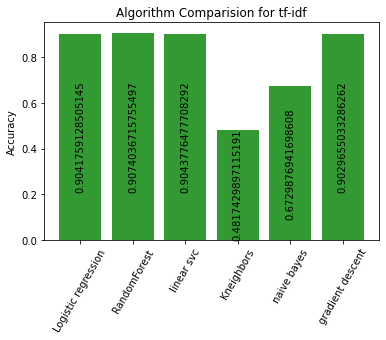

In [391]:
objects = ('Logistic regression', 'RandomForest', 'linear svc', 'Kneighbors', 'naive bayes', 'gradient descent')
algorithm = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]
barplot = plt.bar(algorithm, performance, align='center', alpha=0.8, color='green')
plt.bar_label(barplot, labels=performance, label_type="center", rotation=90)
plt.xticks(algorithm, objects, rotation=60)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for tf-idf')
plt.show()

***

## Compare algorithms with TF-IDF and Polarity scores combined

In [392]:
tfidf_senti = np.concatenate([tfidf_a,sentiment_features],axis=1)
tfidf_senti.shape

(24783, 6798)

## 1: Logistic Regression

In [393]:
import warnings
X = pd.DataFrame(tfidf_senti)
y = hate_df['class'].astype(int)
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

warnings.filterwarnings('ignore')

In [394]:
model_lr1 = LogisticRegression().fit(X_train_tfsenti,y_train)
y_preds = model_lr1.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)

              precision    recall  f1-score   support

           0       0.68      0.18      0.28       285
           1       0.92      0.97      0.94      3815
           2       0.88      0.85      0.86       857

    accuracy                           0.91      4957
   macro avg       0.82      0.67      0.70      4957
weighted avg       0.90      0.91      0.89      4957

Logistic Regression, Accuracy Score: 0.9063949969739762


## 2: Random Forest

In [395]:
model_rf1 = RandomForestClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_rf1.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc2 = accuracy_score(y_test,y_preds)
print("Random forest, Accuracy Score:" , acc2)

              precision    recall  f1-score   support

           0       0.56      0.12      0.20       285
           1       0.91      0.98      0.94      3815
           2       0.88      0.82      0.85       857

    accuracy                           0.90      4957
   macro avg       0.78      0.64      0.66      4957
weighted avg       0.88      0.90      0.88      4957

Random forest, Accuracy Score: 0.8987290700020173


## 3: Linear SVC 

In [396]:
model_lsvc1 = LinearSVC().fit(X_train_tfsenti,y_train)
y_preds = model_lsvc1.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc3 = accuracy_score(y_test,y_preds)
print("Linear SVC, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.60      0.28      0.39       285
           1       0.93      0.96      0.94      3815
           2       0.85      0.88      0.86       857

    accuracy                           0.91      4957
   macro avg       0.80      0.71      0.73      4957
weighted avg       0.90      0.91      0.90      4957

Linear SVC, Accuracy Score: 0.9070002017349204


## 4: K neighbors classifier

In [397]:
model_kn1 = KNeighborsClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_kn1.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc4 = accuracy_score(y_test,y_preds)
print("K neighbors, Accuracy Score:" , acc4)

              precision    recall  f1-score   support

           0       0.39      0.17      0.24       285
           1       0.91      0.73      0.81      3815
           2       0.40      0.84      0.54       857

    accuracy                           0.72      4957
   macro avg       0.57      0.58      0.53      4957
weighted avg       0.79      0.72      0.73      4957

K neighbors, Accuracy Score: 0.7155537623562639


## 5: Naive Bayes

In [398]:
model_nb1 = GaussianNB().fit(X_train_tfsenti,y_train)
y_preds = model_nb1.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc5 = accuracy_score(y_test,y_preds)
print("Naive bayes, Accuracy Score:" , acc5)

              precision    recall  f1-score   support

           0       0.10      0.33      0.15       285
           1       0.89      0.71      0.79      3815
           2       0.57      0.63      0.60       857

    accuracy                           0.67      4957
   macro avg       0.52      0.56      0.51      4957
weighted avg       0.79      0.67      0.72      4957

Naive bayes, Accuracy Score: 0.6729876941698608


## 6: Gradient Descent

In [399]:
model_sgdc1 = SGDClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_sgdc1.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc6 = accuracy_score(y_test,y_preds)
print("the gradient descent, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.69      0.14      0.24       285
           1       0.92      0.97      0.95      3815
           2       0.87      0.88      0.87       857

    accuracy                           0.91      4957
   macro avg       0.83      0.66      0.69      4957
weighted avg       0.90      0.91      0.89      4957

the gradient descent, Accuracy Score: 0.9092192858583821


### Comparisson of accuracies

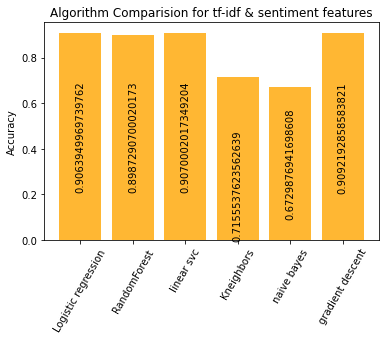

In [400]:
objects1 = ('Logistic regression', 'RandomForest', 'linear svc', 'Kneighbors', 'naive bayes', 'gradient descent')
algorithm = np.arange(len(objects1))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]
plt.bar(algorithm, performance, align='center', alpha=0.8, color='orange')
plt.bar_label(barplot, labels=performance, label_type="center", rotation=90)
plt.xticks(algorithm, objects1, rotation=60)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for tf-idf & sentiment features')
plt.show()


## Compare algorithms with all 3 feature sets

In [401]:
tfidf_senti_addi = np.concatenate([tfidf_a,sentiment_features,addifeatures],axis=1)
tfidf_senti_addi

array([[ 0.,  0.,  0., ..., 53., 10., 10.],
       [ 0.,  0.,  0., ..., 52., 12., 11.],
       [ 0.,  0.,  0., ..., 48., 10.,  9.],
       ...,
       [ 0.,  0.,  0., ..., 51., 10., 10.],
       [ 0.,  0.,  0., ..., 30.,  6.,  6.],
       [ 0.,  0.,  0., ..., 77., 13., 13.]])

In [402]:
X = pd.DataFrame(tfidf_senti_addi)
y = hate_df['class'].astype(int)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

## 1: Logistic Regression

In [403]:
model_lr2 =  LogisticRegression().fit(X_train_all,y_train)
y_preds = model_lr2.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)

              precision    recall  f1-score   support

           0       0.14      0.00      0.01       285
           1       0.82      0.96      0.89      3815
           2       0.65      0.35      0.45       857

    accuracy                           0.80      4957
   macro avg       0.54      0.44      0.45      4957
weighted avg       0.75      0.80      0.76      4957

Logistic Regression, Accuracy Score: 0.802703247932217


## 2: Random Fores

In [404]:
model_rf2 = RandomForestClassifier().fit(X_train_all,y_train)
y_preds = model_rf2.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc2 = accuracy_score(y_test,y_preds)
print("Random Forest, Accuracy Score:" , acc2)

              precision    recall  f1-score   support

           0       0.61      0.09      0.16       285
           1       0.89      0.98      0.93      3815
           2       0.86      0.73      0.79       857

    accuracy                           0.88      4957
   macro avg       0.79      0.60      0.63      4957
weighted avg       0.87      0.88      0.86      4957

Random Forest, Accuracy Score: 0.8835989509784143


## 3: Linear SVC

In [405]:
model_lsvc2 = LinearSVC().fit(X_train_all,y_train)
y_preds = model_lsvc2.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc3 = accuracy_score(y_test,y_preds)
print("Linear SVC, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.81      0.11      0.19       285
           1       0.92      0.96      0.94      3815
           2       0.81      0.88      0.84       857

    accuracy                           0.90      4957
   macro avg       0.85      0.65      0.66      4957
weighted avg       0.90      0.90      0.88      4957

Linear SVC, Accuracy Score: 0.9005446842848497


## 4: K neighbors classifier

In [406]:
model_kn2 = KNeighborsClassifier().fit(X_train_all,y_train)
y_preds = model_kn2.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc4 = accuracy_score(y_test,y_preds)
print("K neighbours classifier, Accuracy Score:" , acc4)

              precision    recall  f1-score   support

           0       0.22      0.06      0.09       285
           1       0.80      0.94      0.87      3815
           2       0.48      0.24      0.32       857

    accuracy                           0.77      4957
   macro avg       0.50      0.41      0.43      4957
weighted avg       0.71      0.77      0.73      4957

K neighbours classifier, Accuracy Score: 0.7667944321161994


## 5: Naive Bayes

In [407]:
model_nb2 = GaussianNB().fit(X_train_all,y_train)
y_preds = model_nb2.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc5 = accuracy_score(y_test,y_preds)
print("Naive bayes, Accuracy Score:" , acc5)

              precision    recall  f1-score   support

           0       0.10      0.34      0.15       285
           1       0.89      0.71      0.79      3815
           2       0.58      0.63      0.60       857

    accuracy                           0.67      4957
   macro avg       0.52      0.56      0.51      4957
weighted avg       0.79      0.67      0.72      4957

Naive bayes, Accuracy Score: 0.6748033084526932


## 6: Gradient Descent

In [408]:
model_sgdc2 = SGDClassifier().fit(X_train_all,y_train)
y_preds = model_sgdc2.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc6 = accuracy_score(y_test,y_preds)
print("gradient descent, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.75      0.06      0.12       285
           1       0.92      0.88      0.90      3815
           2       0.58      0.87      0.69       857

    accuracy                           0.83      4957
   macro avg       0.75      0.61      0.57      4957
weighted avg       0.85      0.83      0.82      4957

gradient descent, Accuracy Score: 0.8319548113778495


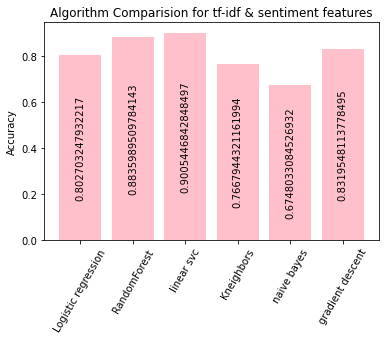

In [409]:
fig, ax = plt.subplots()
objects2 = ('Logistic regression', 'RandomForest', 'linear svc', 'Kneighbors', 'naive bayes', 'gradient descent')
algorithm = np.arange(len(objects2))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]
barplot = plt.bar(algorithm, performance, align='center', alpha=1, color='pink')
plt.bar_label(barplot, labels=performance, label_type="center", rotation=90)
plt.xticks(algorithm, objects2, rotation=60)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for tf-idf & sentiment features')
plt.show()

# undersampling and oversampling to overcome imbalanced classes issue


In [410]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [465]:
#Undersampling
#undersampling resamples the dataset so that majority class will be reduced to match the minority class
#only used tfidf and polarity features
X = pd.DataFrame(tfidf_senti)
#print(X.shape)
y = hate_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
#print(X_train.shape)
und_sampler = RandomUnderSampler(random_state=10)
X_undersampled, y_undersampled = und_sampler.fit_resample(X_train, y_train)
#print(X_undersampled.shape)

(3435, 6798)


In [412]:
y_undersampled.value_counts()

0    1145
1    1145
2    1145
Name: class, dtype: int64

In [413]:
#oversampling
#oversampling resamples the dataset so that minority class will be increased to match the majority class
over_sampler = SMOTE("minority", random_state=10)
X_oversampled, y_oversampled = over_sampler.fit_resample(X_train, y_train)

In [414]:
y_oversampled.value_counts()

0    15375
1    15375
2     3306
Name: class, dtype: int64

## comparing random forest algorithm with undersamples, oversampled and original datatsets using tfidf and polarity features & additional features

### original 

In [415]:
X = pd.DataFrame(tfidf_senti)
y = hate_df['class'].astype(int)
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

model_rf = RandomForestClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_rf.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_ori = accuracy_score(y_test,y_preds)
print("Random forest, Accuracy Score:" , acc_ori)

              precision    recall  f1-score   support

           0       0.50      0.13      0.20       285
           1       0.91      0.97      0.94      3815
           2       0.87      0.82      0.84       857

    accuracy                           0.90      4957
   macro avg       0.76      0.64      0.66      4957
weighted avg       0.88      0.90      0.88      4957

Random forest, Accuracy Score: 0.8963082509582408


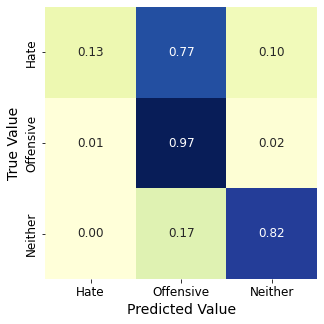

In [416]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

### undersampled

In [468]:
model_rfu = RandomForestClassifier().fit(X_undersampled, y_undersampled)
y_preds = model_rfu.predict(X_test_tfsenti)
print(X_test_tfsenti.shape)

report = classification_report( y_test, y_preds )
print(report)
acc_under = accuracy_score(y_test,y_preds)
print("Random forest with undersampled, Accuracy Score:" , acc_under)

(4957, 6798)
              precision    recall  f1-score   support

           0       0.25      0.67      0.36       285
           1       0.98      0.81      0.89      3815
           2       0.75      0.91      0.82       857

    accuracy                           0.82      4957
   macro avg       0.66      0.80      0.69      4957
weighted avg       0.90      0.82      0.84      4957

Random forest with undersampled, Accuracy Score: 0.8176316320355054


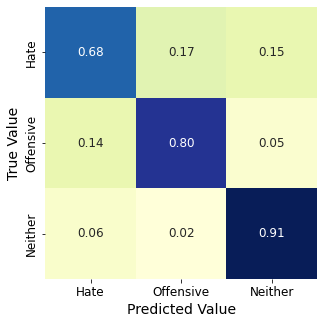

In [461]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

### oversampled

In [419]:
model_rfo = RandomForestClassifier().fit(X_oversampled, y_oversampled)
y_preds = model_rfo.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_over = accuracy_score(y_test,y_preds)
print("Random forest with oversampled, Accuracy Score:" , acc_over)

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       285
           1       0.92      0.95      0.93      3815
           2       0.89      0.77      0.82       857

    accuracy                           0.89      4957
   macro avg       0.75      0.71      0.73      4957
weighted avg       0.88      0.89      0.89      4957

Random forest with oversampled, Accuracy Score: 0.8882388541456526


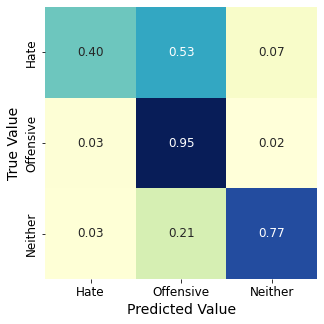

In [420]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

# Grid Search

In [421]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## tuning random forest classifier hyperparameters with undersampled dataset

In [422]:
tuned_rf = RandomForestClassifier()

#parameter grid for randomForest
para_grid = {
    'min_samples_split': [1, 2, 3, 10],
    'n_estimators': [80, 100, 300, 1000],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

#cross validation
cv = StratifiedKFold(n_splits=2, random_state=10, shuffle=True)

scorers = {
    'precision_score': make_scorer(precision_score, average = 'micro') ,
    'recall_score': make_scorer(recall_score, average = 'micro') ,
    'accuracy_score': make_scorer(accuracy_score) ,
    'f1_score': make_scorer(f1_score, average = 'micro')
}

In [423]:
def grid_search(refit_score='precision_score'):
    
    best_clf = GridSearchCV(tuned_rf, para_grid, scoring=scorers, refit=refit_score,
                           cv=cv, return_train_score=True, verbose=1)
    
    best_clf.fit(X_undersampled, y_undersampled)
    
    #get the predictions
    y_pred = best_clf.predict(X_test_tfsenti)
    
    print('Best parameters for {}'.format(refit_score))
    print(best_clf.best_params_)
    
    return best_clf

In [424]:
import warnings 
warnings.filterwarnings("ignore")
grid_search = grid_search(refit_score='precision_score') 

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Best parameters for precision_score
{'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [441]:
#get the final model by implementing the parameters given above by grid search
final_model = RandomForestClassifier(max_features = 'sqrt', min_samples_leaf=3, min_samples_split=10, n_estimators=100 )
final_model.fit(X_undersampled, y_undersampled)
#print(X_undersampled.shape)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10)

### evaluate the final model

In [458]:
y_preds = final_model.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_final = accuracy_score(y_test,y_preds)
print("Accuracy Score:" , acc_final)

              precision    recall  f1-score   support

           0       0.29      0.68      0.41       285
           1       0.98      0.82      0.89      3815
           2       0.72      0.92      0.81       857

    accuracy                           0.83      4957
   macro avg       0.66      0.80      0.70      4957
weighted avg       0.89      0.83      0.85      4957

Accuracy Score: 0.8289287875731289


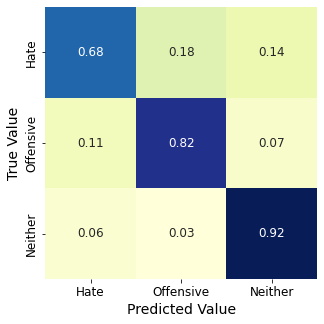

In [443]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

# preparing the model to deploy on to the web application

To make our model operational for the application we first need to create functions for all the preparative steps the user's input text will go through to give a prediction. Then the model will be able to translate wether his input is hate speech, offensive language, or neither of them.

These preparative functions involve:

the preprocessing of the tweets (removal of punctuation & special characters, stemming, tokenization,...) the creation of the final features used for classification: the TF-IDF array, the sentiment analysis, and the additional textual features Finally we define a get_predictions function that will get the input text to funnel through the previous functions and lead to the prediction.

In [444]:
stopwords = nltk.corpus.stopwords.words("english")
exclusions = ["#ff", "ff", "rt"]
stopwords.extend(exclusions)
stopwords.remove("not")
stemmer = PorterStemmer()

def preprocess(tweet):
    
    #remove extra spaces
    regex_pattern = re.compile(r'\s+')
    tweet_space_removed = tweet.str.replace(regex_pattern, ' ')
    
    #remove mentions(@)
    regex_patten = re.compile(r'@[\w\-]+')
    tweets = tweet_space_removed.str.replace(regex_patten, '')
    
    #remove URLs
    url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets_new = tweets.str.replace(url_regex, '')
    
    #remove numbers and punctuations
    remove_punc_num = tweets_new.str.replace("[^a-zA-Z]", " ")
    
    #replace whitespaces with space
    newtweet = remove_punc_num.str.replace(r'\s+', ' ')
    
    #remove leading and trailing whitespaces
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    
    #lowercase
    tweets_lower = newtweet.str.lower()
    
    #tokenize
    tokenized_tweet = tweets_lower.apply(lambda x: x.split())
    
    #remove stop words
    tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])
    
    #stem the tweet
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_pre = tokenized_tweet
        
    return tweets_pre



In [445]:
def tfidf_featurs(tweet):
    tweet = pd.Series(tweet)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
    tfidf_vectorizer.fit_transform(hate_df['preprocessed_tweets'])
    tfidf_string = tfidf_vectorizer.transform(tweet)
    tfidf_array = tfidf_string.toarray()
    return tfidf_array

In [446]:
sentiment_analyzer=VS()

def sentiment_analysis_string(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis_string(t))
    return np.array(features)


In [447]:
from sklearn.preprocessing import StandardScaler

In [448]:
def get_predictions(tweet):
    
    #convert the input string to a panda series
    tweet = pd.Series(tweet)
    
    #Get the sentiment analysis of the un-preprocessed string
    #we need to apply this function when the string is not yet pre processed in order to keep the whole meaning
    #of the sentence
    polarity_scores = sentiment_analysis_array(tweet)
    
    #preprocess the input string
    preprocessed_string = preprocess(tweet)
    
    #convert input string to a vector array
    array_tfidf = tfidf_featurs(tweet)
    
    #concatenate all the features
    final_features = np.concatenate([array_tfidf, polarity_scores], axis=1)
    #print(final_features.shape)
    
    #transform features array to a dataframe
    final_df = pd.DataFrame(final_features)
    #print(final_df.shape)
    
    #apply final model to the input string
    prediction = final_model.predict(final_df)
    
    if prediction == 0:
        return "Hate speech"
    elif prediction == 1:
        return "Offensive Language"
    elif prediction == 2:
        return "neither"
    else:
        return "no label"
    return prediction
    
    


In [449]:
tweet_test_2 = "you don't deserive this shit"
get_predictions(tweet_test_2)

(1, 6798)
(1, 6798)


'Offensive Language'

In [450]:
tweet_test = "black people are rude and stupid"
get_predictions(tweet_test)

(1, 6798)
(1, 6798)


'Hate speech'

In [451]:
tweet_test_5 = "you do a pretty good job of being a total douche!"
get_predictions(tweet_test_5)

(1, 6798)
(1, 6798)


'neither'

In [452]:
tweet_test_6 = "You post shit content"
get_predictions(tweet_test_6)

(1, 6798)
(1, 6798)


'Offensive Language'

In [453]:
tweet_test_10 = "all muslims aren't terrorists"
get_predictions(tweet_test_10)

(1, 6798)
(1, 6798)


'neither'

In [454]:
tweet_test_11 = "all muslims are terrorists"
get_predictions(tweet_test_11)

(1, 6798)
(1, 6798)


'Hate speech'

In [455]:
import pickle
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))